In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [2]:
gas=pd.read_csv(r'C:\Users\Shiva\Desktop\ExcelR assignments\Neural Network\gas_turbines.csv')

In [3]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### Checking for null values

In [4]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Checking for duplicate values

In [5]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Distributions of the independant variables

C:\Users\Shiva\AppData\Local\Temp\ipykernel_5716\898318937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas.AT)


<Axes: xlabel='AT', ylabel='Density'>

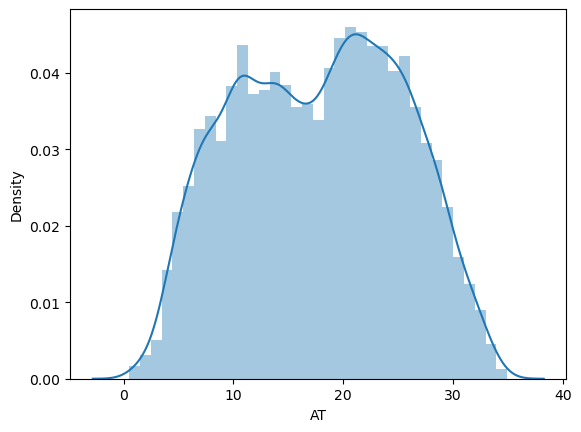

In [6]:
sns.distplot(gas.AT)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_5716\852744401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas.AP)


<Axes: xlabel='AP', ylabel='Density'>

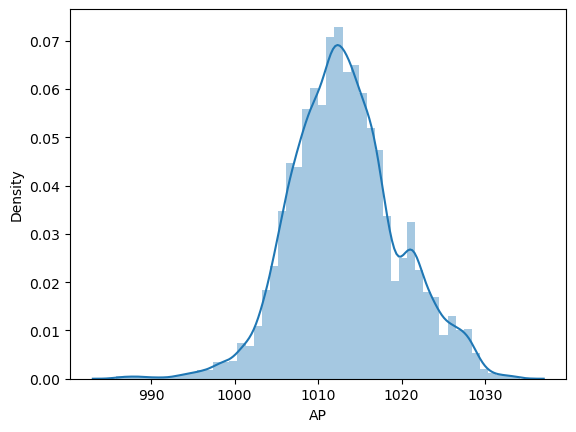

In [7]:
sns.distplot(gas.AP)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_5716\1676358491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas.AH)


<Axes: xlabel='AH', ylabel='Density'>

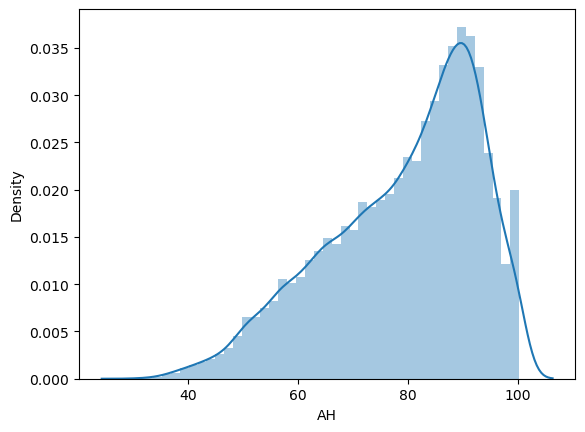

In [8]:
sns.distplot(gas.AH)

### Splitting dependant and independant variables

In [9]:
y=gas["TEY"]

### Only taking ambient variables as independant variables

In [10]:
x=gas.iloc[:,:3]

In [11]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### Converting the independant variables into a numpy array

In [13]:
x1=x.values

In [14]:
x1


array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [15]:
y1=y.values

In [16]:
y1

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

### Model Building

### We use relu as activation function n input and hidden layers and linear as activation function in the output layer.

### We use mean squared error as the loss function

In [17]:
model=Sequential()
model.add(Dense(3,  activation='relu'))
model.add(Dense(3,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
history=model.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250

1008/1008 [==============================] - 4s 3ms/step - loss: 20098.8809 - val_loss: 17398.9004
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 18177.3516 - val_loss: 17140.7969
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17912.2129 - val_loss: 16882.4844
Epoch 4/250
1008/1008 [==============================] - 4s 4ms/step - loss: 17647.9199 - val_loss: 16625.5762
Epoch 5/250
1008/1008 [==============================] - 4s 4ms/step - loss: 17385.3633 - val_loss: 16370.7012
Epoch 6/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17124.6680 - val_loss: 16117.6309
Epoch 7/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16865.9375 - val_loss: 15866.6504
Epoch 8/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16609.2480 - val_loss: 15617.6826
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16354.6631 - val_loss: 15370.7432


Epoch 73/250
1008/1008 [==============================] - 3s 3ms/step - loss: 4244.6704 - val_loss: 3750.7954
Epoch 74/250
1008/1008 [==============================] - 3s 3ms/step - loss: 4120.6816 - val_loss: 3634.3984
Epoch 75/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3998.7341 - val_loss: 3520.0686
Epoch 76/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3878.7053 - val_loss: 3407.6489
Epoch 77/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3760.8174 - val_loss: 3297.4272
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3644.9231 - val_loss: 3189.0901
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3530.9353 - val_loss: 3082.6055
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3418.8848 - val_loss: 2978.2073
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3308.8970 - val_loss: 2875.8000
Epoch 82/2

Epoch 148/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.2920 - val_loss: 240.3186
Epoch 149/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.2122 - val_loss: 240.7562
Epoch 150/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.1581 - val_loss: 241.1718
Epoch 151/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.1181 - val_loss: 241.5143
Epoch 152/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0913 - val_loss: 241.7879
Epoch 153/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0736 - val_loss: 242.0257
Epoch 154/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0628 - val_loss: 242.2201
Epoch 155/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0544 - val_loss: 242.4023
Epoch 156/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0506 - val_loss: 242.5281
Epoch 157/250
1008/

In [20]:
model.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 251.7812


251.78125

### The model has as mse error of 223.43

In [21]:
pred=model.predict(x1)

470/470 [==============================] - 1s 2ms/step


In [22]:
pred

array([[135.29205],
       [135.29205],
       [135.29205],
       ...,
       [135.29205],
       [135.29205],
       [135.29205]], dtype=float32)

In [23]:
history.history

{'loss': [20098.880859375,
  18177.3515625,
  17912.212890625,
  17647.919921875,
  17385.36328125,
  17124.66796875,
  16865.9375,
  16609.248046875,
  16354.6630859375,
  16102.07421875,
  15851.44140625,
  15602.8681640625,
  15356.3271484375,
  15111.76171875,
  14869.1953125,
  14628.7109375,
  14390.1123046875,
  14153.6181640625,
  13919.193359375,
  13686.80078125,
  13456.341796875,
  13227.89453125,
  13001.556640625,
  12777.1318359375,
  12554.81640625,
  12334.509765625,
  12116.1025390625,
  11899.724609375,
  11685.4130859375,
  11473.05078125,
  11262.6943359375,
  11054.431640625,
  10848.1953125,
  10643.912109375,
  10441.5908203125,
  10241.3994140625,
  10043.107421875,
  9846.857421875,
  9652.6416015625,
  9460.44140625,
  9270.2744140625,
  9082.13671875,
  8895.9736328125,
  8711.8515625,
  8529.6865234375,
  8349.5712890625,
  8171.44287109375,
  7995.32763671875,
  7821.16259765625,
  7649.12890625,
  7479.04248046875,
  7310.96728515625,
  7144.8701171875,
 

### Plotting the mse error vs epoch

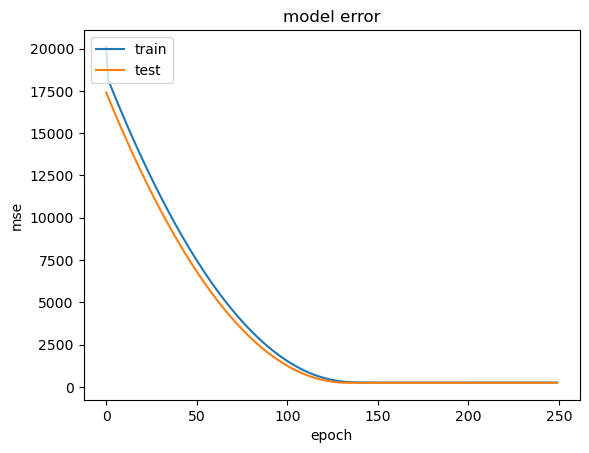

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### decreasing the number of nodes in hidden layer

In [25]:
model2=Sequential()
model2.add(Dense(3,  activation='relu'))
model2.add(Dense(2,  activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')
history=model2.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 5s 4ms/step - loss: 548.7066 - val_loss: 261.0387
Epoch 2/250
1008/1008 [==============================] - 4s 4ms/step - loss: 254.3565 - val_loss: 242.1283
Epoch 3/250
1008/1008 [==============================] - 4s 3ms/step - loss: 240.5016 - val_loss: 224.7582
Epoch 4/250
1008/1008 [==============================] - 4s 4ms/step - loss: 233.2163 - val_loss: 221.5341
Epoch 5/250
1008/1008 [==============================] - 4s 4ms/step - loss: 228.4028 - val_loss: 219.8486
Epoch 6/250
1008/1008 [==============================] - 5s 5ms/step - loss: 227.7779 - val_loss: 221.0084
Epoch 7/250
1008/1008 [==============================] - 12s 12ms/step - loss: 226.4180 - val_loss: 225.7886
Epoch 8/250
1008/1008 [==============================] - 7s 7ms/step - loss: 226.1846 - val_loss: 238.4176
Epoch 9/250
1008/1008 [==============================] - 5s 5ms/step - loss: 226.0570 - val_loss: 230.7416
Epoch 10/250
1008/1008 [===========

Epoch 77/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.0538 - val_loss: 233.1024
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.6687 - val_loss: 226.0461
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.7177 - val_loss: 229.2754
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.0702 - val_loss: 234.2096
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.9562 - val_loss: 223.2246
Epoch 82/250
1008/1008 [==============================] - 3s 3ms/step - loss: 226.4361 - val_loss: 224.1200
Epoch 83/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.5937 - val_loss: 225.4116
Epoch 84/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.7300 - val_loss: 235.1756
Epoch 85/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.3885 - val_loss: 223.4132
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 3s 3ms/step - loss: 224.7548 - val_loss: 230.2588
Epoch 228/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.5590 - val_loss: 224.6379
Epoch 229/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.0496 - val_loss: 230.0728
Epoch 230/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.0402 - val_loss: 223.7468
Epoch 231/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.5487 - val_loss: 223.2386
Epoch 232/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.8962 - val_loss: 225.0359
Epoch 233/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.2199 - val_loss: 244.8961
Epoch 234/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.7465 - val_loss: 226.9470
Epoch 235/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.9707 - val_loss: 223.7296
Epoch 236/250
1008/1008 [========

In [26]:
model2.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 231.3851


231.38511657714844

### This model gives a significantly worse error

### Adding an additional hidden layer to the model

In [27]:
model3=Sequential()
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer='adam')
history=model3.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 4s 3ms/step - loss: 18424.0605 - val_loss: 17378.6777
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 18154.3652 - val_loss: 17116.9785
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17887.2148 - val_loss: 16857.7246
Epoch 4/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17622.3730 - val_loss: 16600.6484
Epoch 5/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17359.6973 - val_loss: 16345.7363
Epoch 6/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17099.1777 - val_loss: 16092.9062
Epoch 7/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16840.6953 - val_loss: 15842.1426
Epoch 8/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16584.3086 - val_loss: 15593.4473
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16329.8545 - val_loss: 15346.6309
E

Epoch 75/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3986.7646 - val_loss: 3508.8242
Epoch 76/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3866.9722 - val_loss: 3396.6868
Epoch 77/250
1008/1008 [==============================] - 4s 4ms/step - loss: 3749.2549 - val_loss: 3286.5474
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3633.4846 - val_loss: 3178.3423
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3519.6931 - val_loss: 3072.1243
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3407.8040 - val_loss: 2967.8464
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3297.9785 - val_loss: 2865.6235
Epoch 82/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3190.1030 - val_loss: 2765.3386
Epoch 83/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3084.2896 - val_loss: 2667.1558
Epoch 84/2

Epoch 150/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.1527 - val_loss: 241.1821
Epoch 151/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.1159 - val_loss: 241.5530
Epoch 152/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0909 - val_loss: 241.8063
Epoch 153/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0737 - val_loss: 242.0446
Epoch 154/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0626 - val_loss: 242.2297
Epoch 155/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0555 - val_loss: 242.3720
Epoch 156/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0485 - val_loss: 242.5280
Epoch 157/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0461 - val_loss: 242.6240
Epoch 158/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0433 - val_loss: 242.7202
Epoch 159/250
1008/

In [28]:
model3.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 251.7832


251.7831573486328

### Plotting the mse

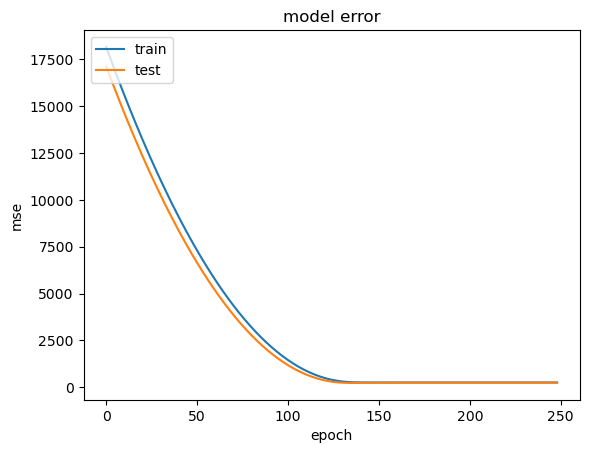

In [29]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### model and model3 has comparable accuracy and model is computationally simpler so model1 is taken as final model

In [30]:
model_final=model1